**1 Cài Đặt Thư Viện**

In [1]:
%pip install imageio
%pip install scipy
%pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**2 Viết chương trình xử lý ảnh cơ bản**

**2.1 Nạp ảnh sử dụng thư viện python imgae library(PIL)**

In [2]:
from PIL import Image
import numpy as np
img = Image.open('bird.png')
img.show()

**2.2 nạp ảnh sử dụng lệnh thư viện iimageio**

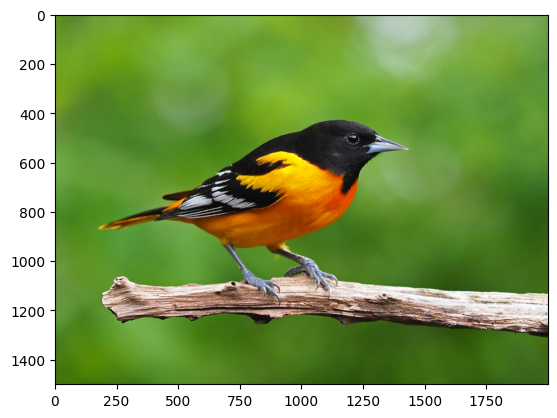

In [3]:
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
plt.imshow(data)
plt.show()


**2.3 độ phân giải ảnh**
- Viết Chương Trình nạp ảnh màu và chuyển sang ảnh GrayscaleGrayscale

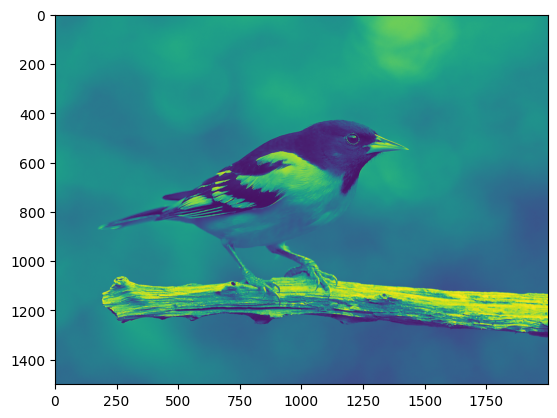

In [6]:
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='F')
plt.imshow(data)
plt.show()

- Viết chương trình nạp ảnh grayscale và giảm 4 bit thấp, giữ 4 bi cao và lưu tên là birdF0.png

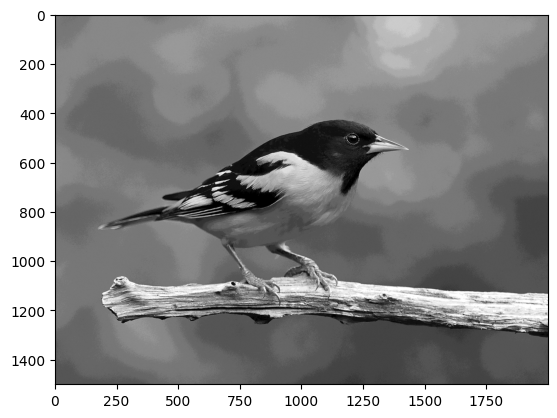

In [23]:
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='F').astype(np.uint8)
cl = data & 0xF0
iio.imsave('birdf0.png',cl)
tmp = iio.imread('birdf0.png')
plt.imshow(tmp, cmap = 'gray')
plt.show()

**Bài tập tạo ảnh mới birde0.png và bird80.png với intensity resolution là 0xc0 và 0x80. kết quả**

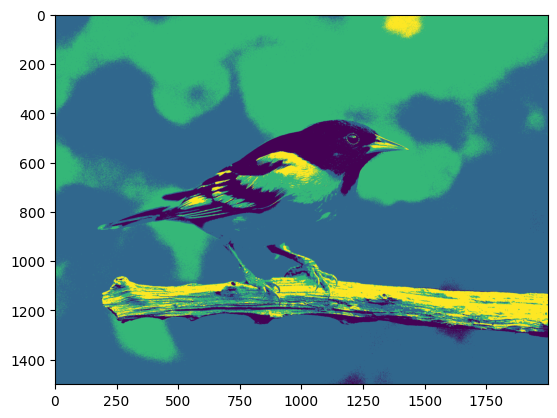

In [17]:
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='F').astype(np.uint8)
cl = data & 0xc0
iio.imsave('birdc0.png',cl)
tmp = iio.imread('birdc0.png')
plt.imshow(tmp)
plt.show()

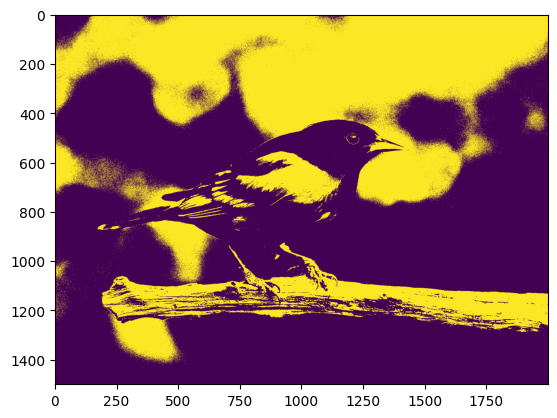

In [18]:
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png', mode='F').astype(np.uint8)
cl = data & 0x80
iio.imsave('bird80.png',cl)
tmp = iio.imread('bird80.png')
plt.imshow(tmp)
plt.show()

**2.4 Màu Sắc với hệ RGB**

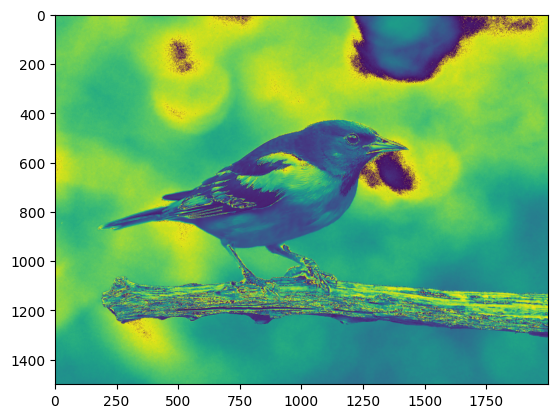

In [19]:
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('bird.png')
bdata = (data[:,:,1] + data[:,:,2])
plt.imshow(bdata)
plt.show()

**2.5 Màu sắc hệt HSV**

In [20]:
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

a = colorsys.rgb_to_hsv(255, 0, 0)
b = colorsys.rgb_to_hsv(1, 0, 0)
c = colorsys.rgb_to_hsv(0, 225, 0)
d = colorsys.hsv_to_rgb(1, 1, 255)
print(a)
print(b)
print(c)
print(d)

(0.0, 1.0, 255)
(0.0, 1.0, 1)
(0.3333333333333333, 1.0, 225)
(255, 0.0, 0.0)


**2.6 Ứng dụng chuyển đổi hệ màu**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


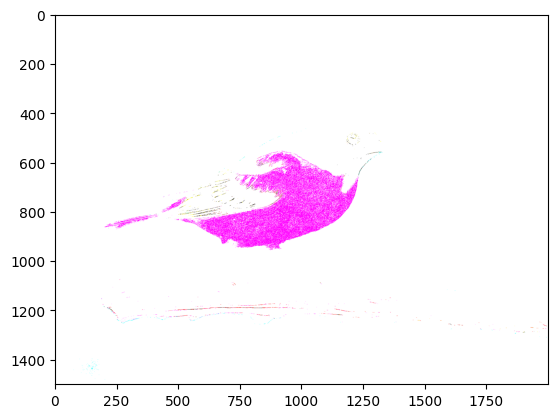

In [41]:
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys

rgb = iio.imread('bird.png')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h,s,v = rgb2hsv(rgb[:,:,0], rgb[:,:,2],rgb[:,:,1])
h *= h
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
rgb2 = hsv2rgb(h,s,v)
rgb2 = np.array(rgb2).transpose((1,2,0))
plt.imshow(rgb2)
plt.show()

**2.7 Lọc ảnh**

- mean filter

[[119 119 119 ... 132 131 131]
 [119 119 119 ... 131 131 131]
 [120 120 119 ... 132 132 131]
 ...
 [ 89  89  89 ...  80  80  80]
 [ 89  89  89 ...  80  80  80]
 [ 90  89  89 ...  80  80  80]]


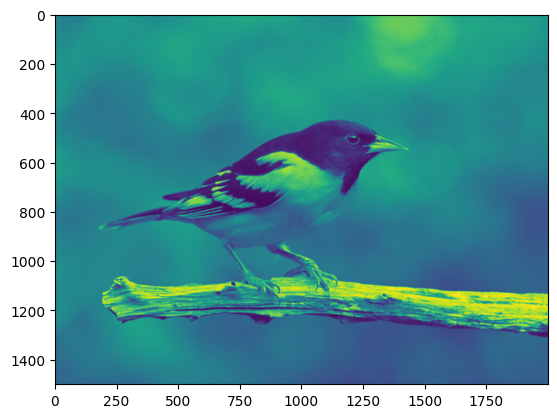

In [32]:
import numpy as np 
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

a=iio.imread('bird.png', mode = 'F')

k=np.ones((5,5))/25

b = sn.convolve(a,k).astype(np.uint8)
iio.imsave('bird_mean_filter.png',b)

print(b)
plt.imshow(b)
plt.show()

- median filter

[[118 118 118 ... 131 131 131]
 [118 118 119 ... 131 131 131]
 [119 119 119 ... 132 131 131]
 ...
 [ 89  88  88 ...  81  81  81]
 [ 89  88  88 ...  80  81  81]
 [ 89  88  89 ...  80  80  81]]


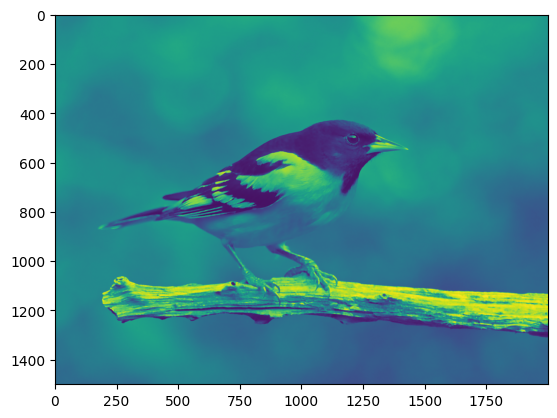

In [58]:
import numpy as np 
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

a=iio.imread('bird.png', mode = 'F').astype(np.uint8)

b=sn.median_filter(a, size=5, footprint=None, 
                   output=None,mode='reflect',cval=0.0, origin=0)
iio.imsave('bird_median_filter.png',b)

print(b)
plt.imshow(b)
plt.show()

- max filter

[[121 121 121 ... 138 138 138]
 [128 128 128 ... 138 138 138]
 [128 128 128 ... 138 138 138]
 ...
 [ 96  96  96 ...  83  83  83]
 [ 96  96  96 ...  83  83  83]
 [ 96  96  96 ...  83  83  83]]


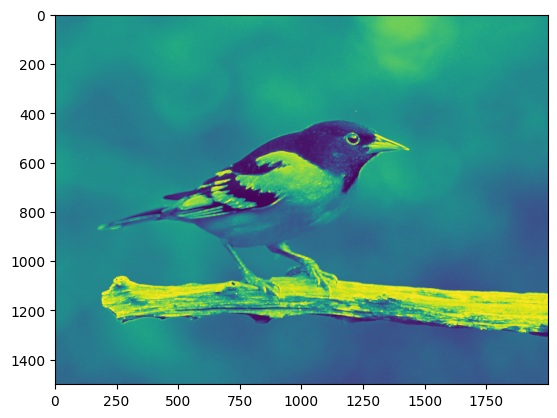

In [57]:
import numpy as np 
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

a=iio.imread('bird.png', mode = 'F').astype(np.uint8)
b=sn.maximum_filter(a, size=5, footprint=None, 
                   output=None,mode='reflect',cval=0.0, origin=0)
iio.imsave('bird_max_filter.png',b)


print(b)
plt.imshow(b)
plt.show()

- min filter

[[117 117 117 ... 127 127 127]
 [113 113 113 ... 127 127 127]
 [113 113 113 ... 127 127 127]
 ...
 [ 85  85  85 ...  76  76  76]
 [ 85  85  85 ...  76  76  76]
 [ 85  85  85 ...  78  78  78]]


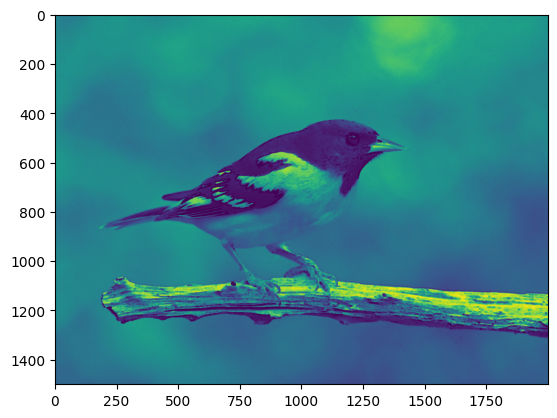

In [56]:
import numpy as np 
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pylab as plt
import colorsys

a=iio.imread('bird.png', mode = 'F').astype(np.uint8)
b=sn.minimum_filter(a, size=5, footprint=None, 
                   output=None,mode='reflect',cval=0.0, origin=0)
iio.imsave('bird_min_filter.png',b)


print(b)
plt.imshow(b)
plt.show()

**3 Bai Tap**

**1 Viet chuong trinh nap 1 anh va luu thanh 3 anh voi 3 mau khac nhau**

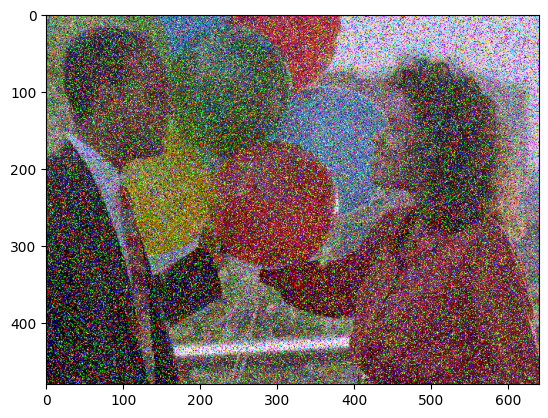

In [46]:
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('exercise/balloons_noisy.png')
plt.imshow(data)
plt.show()

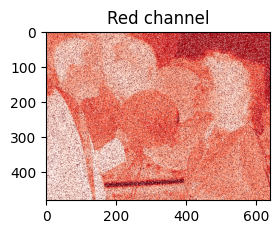

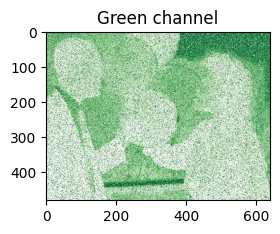

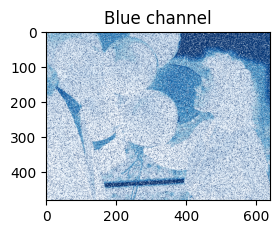

(480, 640, 3)

In [2]:
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('exercise/balloons_noisy.png')

plt.subplot(2,2,1)
plt.title("Red channel")
plt.imshow(data[:,:,0], cmap = 'Reds')
iio.imsave('exercise/balloons_noisy_red.png', data[:,:,0])
plt.show()
data.shape

plt.subplot(2,2,2)
plt.title("Green channel")
plt.imshow(data[:,:,1], cmap = 'Greens')
iio.imsave('exercise/balloons_noisy_greengreen.png', data[:,:,1])
plt.show()
data.shape

plt.subplot(2,2,3)
plt.title("Blue channel")
plt.imshow(data[:,:,2], cmap = 'Blues')
iio.imsave('exercise/balloons_noisy_blueblue.png', data[:,:,2])
plt.show()
data.shape

**2 Viet chuong trinh nhap anh va hoan doi gia tri cac mau**

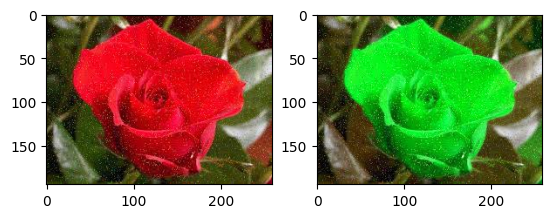

In [8]:
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('exercise/flower.jpeg')
swapped = data[:,:,[1,0,2]]
iio.imwrite('exercise/flower_xanhla.png',swapped)
plt.subplot(1,2,1)
plt.imshow(data)
plt.subplot(1,2,2)
plt.imshow(swapped)
plt.show()



**3 chuyen sang HSV va luu thanh 3 anh voi 3 mau khac nhau**

In [ ]:
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys
img = iio.imread('exercise/flower.jpeg')
rgb2hsv = np.vectorize(colorsys.rgb_to_hsv)
h,s,v = rgb2hsv(img[:,:,0]/255, img[:,:,1]/255, img[:,:,2]/255)

iio.imwrite('exercise/h.png', (h * 255).astype(np.uint8))
iio.imwrite('exercise/s.png', (s * 255).astype(np.uint8))
iio.imwrite('exercise/v.png', (v * 255).astype(np.uint8))

**4 chuyen sang HSV va thay doi Hnew = 1/3 Hold va Vnew = 3/4 Vold**

In [18]:
import numpy as np 
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys
h = h/3
v = v*0.75
hsv2rgb = np.vectorize(colorsys.hsv_to_rgb)
r,g,b=hsv2rgb(h,s,v)
rgb_new = np.dstack((r,g,b))*255
iio.imwrite('exercise/hsv_modified.png', rgb_new.astype(np.uint8))